# Saudi Arabia Weather History

In [1]:
# Importing required libraries
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [87]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Capstone_Project/saudi_arabia_weather_history.csv")
# Display the top 5 rows
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


## About the data:
Through this dataset, we provide hourly historical weather data for all Saudi Arabia cities from 2017 to 2019 . Included a date for which you would like to see weather history such as temperature, wind, humidity, barometer, and visibility.

**Data Source** : [click here](https://www.kaggle.com/esraamadi/saudi-arabia-weather-history)

## Variable Definitions
- **city**: KSA city name
- **date**: recorded date
- **time**: recorded time
- **year**: recorded date - year
- **month**: recorded date - month
- **day**: recorded date - day
- **hour**: recorded time - hour
- **minute**: recorded time - minute
- **weather**: recorded weather description ( clear - sunny - .... )
- **temp**: recorded temperature (°C)
- **wind**: recorded wind speed (km/h)
- **humidity**: recorded quality of being humid (%)
- **barometer**: recorded atmospheric pressure (mb)
- **visibility**: recorded how much be able to see or be seen (km)

In [53]:
# Display the bottom 5 rows
df.tail(5) 

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
249018,2848,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,2849,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,2850,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,2851,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16
249022,2852,Jawf,30 April 2019,23:00,2019,4,30,23,0,Clear,24,7,29%,1017.0,16


In [54]:
# Checking the data type
df.dtypes

Unnamed: 0      int64
city           object
date           object
time           object
year            int64
month           int64
day             int64
hour            int64
minute          int64
weather        object
temp            int64
wind            int64
humidity       object
barometer     float64
visibility      int64
dtype: object

In [55]:
# Total number of rows and columns
df.shape

(249023, 15)

In [56]:
# Checking for duplicated rows
print("Number of duplicate rows: ",sum(df.duplicated()))

Number of duplicate rows:  0


In [57]:
# Finding the null values
df.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [58]:
# Filling missing values using forward and backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

# Check 
df.isnull().sum()

Unnamed: 0    0
city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

# Wind Turbines

**To calculate the output power from wind turbines, the following formula is used:**

$P_o = (1/2)C_pρAV^3 $
<br>where,<br>
$P_o$ = The electrical output power from a wind turbine (W)

$C_p$ = Overall efficiency of the wind turbine

$ρ$ = Air density (kg/$m^3$)

$A$ = Swept area by turbine blades  ($m^2$)

$V$ = Wind speed (m/s)

**Here is the selected wind turbine**

https://www.siemensgamesa.com/products-and-services/onshore/wind-turbine-sg-3-4-132

In [83]:
#Converting Wind Speed From km/h to m/s

df["Wind_mps"] = df["wind"]/3.6

#Converting hPa into Pa

df["Pressure"] = df["barometer"]*100

#Converting Temperature from Celsius to Kelven

df["Temp_Kelven"] = df["temp"] + 273.15

#Calculating Dry Air Density

Air_Density = 1.225 #kg/m^3
Rspecific = 287.058 #J/(kg.K)

df["Dry_Air_Density"] = df["Pressure"]/(Rspecific*df["Temp_Kelven"])

#Defining the overall efficiency of the wind turbine

Cp = 0.25 #Typically between 0.20 to 0.30

#Calculating Power Generated From Wind Turbines

Blade_Length = 64.5
df["Power_Output_kW"] = Cp*(0.5*df["Dry_Air_Density"]*3.14*(Blade_Length**2)*(df["Wind_mps"]**3))/1000
#kg*m^2/ s^3 

df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,...,wind,humidity,barometer,visibility,weather_category,Wind_mps,Pressure,Temp_Kelven,Dry_Air_Density,Power_Output_kW
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,...,11,64%,1018.0,16,Clear,3.055556,101800.0,290.15,1.222237,56.935769
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,...,6,64%,1018.0,16,Clear,1.666667,101800.0,290.15,1.222237,9.239764
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,...,11,72%,1019.0,16,Clear,3.055556,101900.0,288.15,1.231930,57.387268
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,...,11,72%,1019.0,16,Clear,3.055556,101900.0,288.15,1.231930,57.387268
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,...,9,72%,1019.0,16,Clear,2.500000,101900.0,288.15,1.231930,31.431494


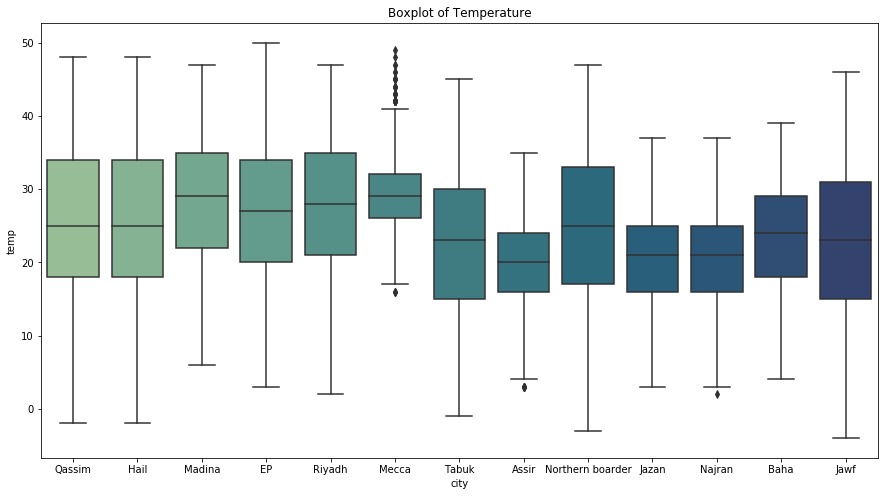

In [60]:
# Draw a nested boxplot to show bills by day and tim
plt.figure(figsize=(15,8))

sns.boxplot(
    x="city", 
    y="temp",
    data=df, 
    palette='crest'
)

plt.title("Boxplot of Temperature");

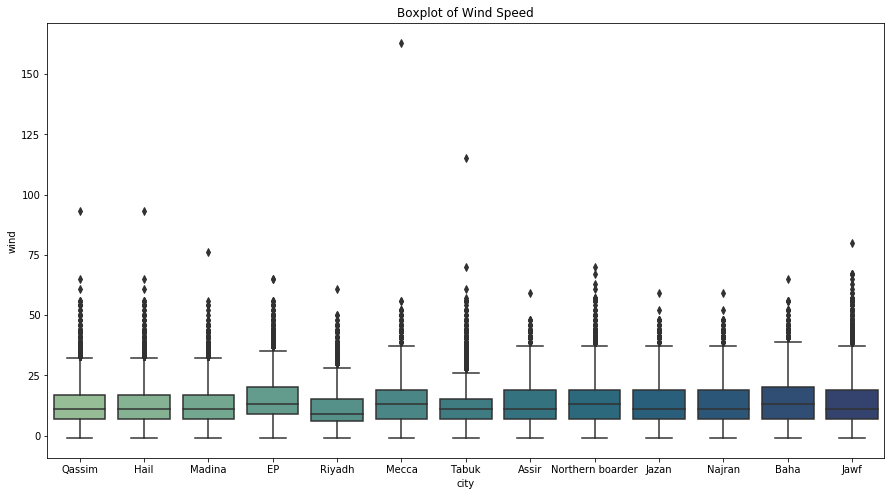

In [61]:
#Boxplot of Wind Speed For Different Cities
plt.figure(figsize=(15,8))

sns.boxplot(
    x="city", 
    y="wind",
    data=df, 
    palette='crest'
)

plt.title("Boxplot of Wind Speed");

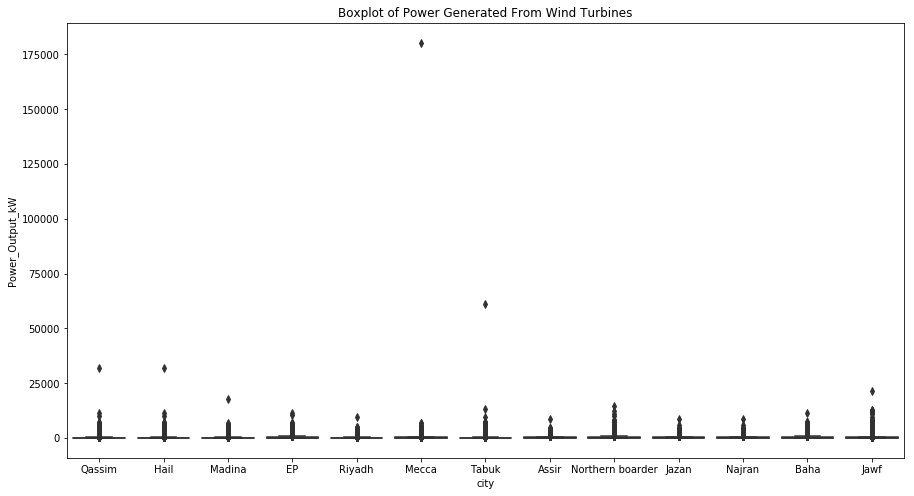

In [62]:
#Boxplot of power generated from wind turbines of different cities
plt.figure(figsize=(15,8))

sns.boxplot(
    x="city", 
    y="Power_Output_kW",
    data= df, 
    palette='crest'
)

plt.title("Boxplot of Power Generated From Wind Turbines");

In [63]:
#Removing Outliers
df1 = df.copy() 
  
''' Detection '''
# IQR
Q1 = np.percentile(df['wind'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['wind'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['wind'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['wind'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)
  
print("New Shape: ", df1.shape) 

Old Shape:  (249023, 20)
New Shape:  (245421, 20)


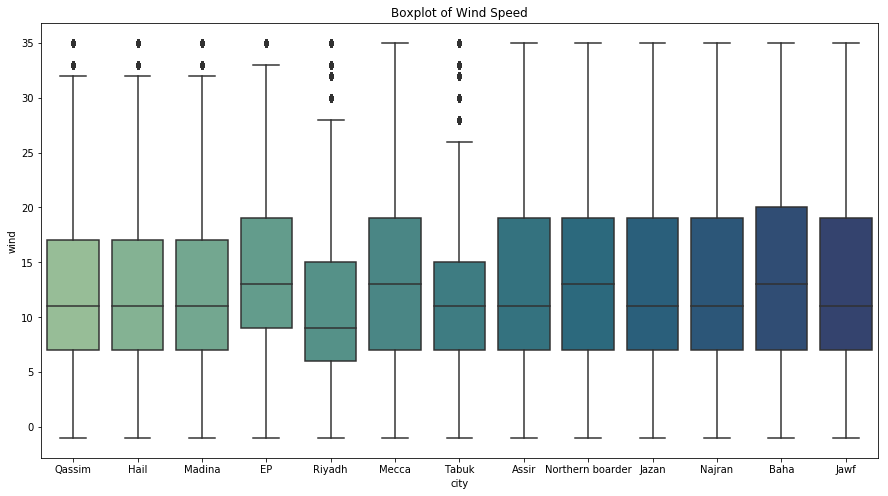

In [64]:
#Boxplot of wind speed data after removing outliers
plt.figure(figsize=(15,8))

sns.boxplot(
    x="city", 
    y="wind",
    data=df1, 
    palette='crest'
)

plt.title("Boxplot of Wind Speed");

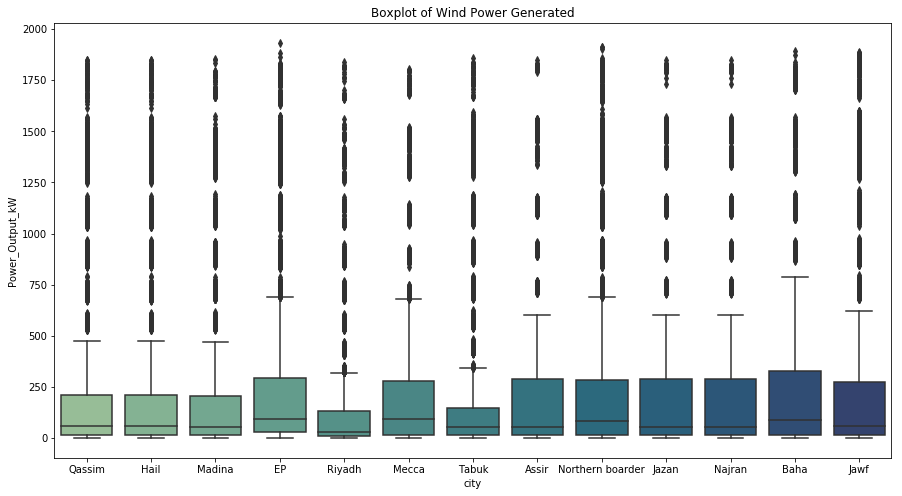

In [65]:
#Boxplot of wind power generated data after removing outliers

plt.figure(figsize=(15,8))

sns.boxplot(
    x="city", 
    y="Power_Output_kW",
    #hue="city",
    data= df1, 
    palette='crest'
)

plt.title("Boxplot of Wind Power Generated");

In [88]:
# drop unused column
df = df.drop(['Unnamed: 0'], axis = 1)

In [66]:
# values for 'weather' column
df['weather'].value_counts()

Clear                                          98827
Sunny                                          82194
Passing clouds                                 34380
Scattered clouds                               15304
Partly sunny                                    6925
                                               ...  
Sprinkles  Low level haze                          1
Rain showers  Partly sunny                         1
Strong thunderstorms  Partly sunny                 1
Strong thunderstorms  More clouds than sun         1
Heavy rain  Overcast                               1
Name: weather, Length: 81, dtype: int64

In [85]:
# create a function to classify the values in 'weather' column 
def weather_cleaning(col):
    # Weather conditions that refers to Mostly clear in 'weather' column
    Mostly_clear = ['Broken clouds ', 'Passing clouds ', 'Rain  Clear ']
    # Weather conditions that refers to Partly cloudy in 'weather' column
    Partly_cloudy = ['Partly sunny ', 'Drizzle  More clouds than sun ', 'Thunderstorms  Partly sunny ',
                     'Thunderstorms  Scattered clouds ', 'Light rain  More clouds than sun ', 'Light rain  Partly cloudy ',
                     'Light rain  Scattered clouds ', 'Low level haze ', 'More clouds than sun ', 'Rain  Broken clouds ',
                     'Rain  Partly cloudy ', 'Scattered clouds', 'Rain  Scattered clouds','Sprinkles  Cloudy', 
                     'Thundershowers  Partly sunny ', 'Drizzle  Partly sunny ', 'Thundershowers  Passing clouds ', 
                     'Thundershowers  Scattered clouds ', 'Thunderstorms  Broken clouds ', 'Thunderstorms  Partly cloudy ', 
                     'Thunderstorms  Partly sunny ', 'Thunderstorms  Passing clouds ', 'Heavy rain  Partly sunny ', 
                     'Light rain  Partly sunny ', 'Light rain  Passing clouds ', 'Rain  Passing clouds ',
                     'Thunderstorms  Scattered clouds ', 'Rain  Partly sunny ','Rain showers  Partly sunny ']
    # Weather conditions that refers to Prevailingly cloudy in 'weather' column
    Prevailingly_cloudy = ['Cloudy ', 'Drizzle  More clouds than sun ', 'Drizzle  Mostly cloudy ', 'Fog ', 'Hail  Partly sunny ',
                           'Drizzle  Broken clouds ', 'Hail  Passing cloud ', 'Haze', 'Heavy rain  More clouds than sun ',
                           'Heavy rain  Mostly cloudy ', 'Light rain  Broken clouds ', 'Light rain  Fog ', 
                           'Light rain  Mostly cloudy ', 'Mostly cloudy ', 'Rain  More clouds than sun ','Rain  Mostly cloudy ',
                           'Sprinkles  Duststorm ', 'Sprinkles  Low level haze ', 'Strong thunderstorms  More clouds than sun ',
                           'Thunderstorms  Passing clouds ', 'Strong thunderstorms  Partly sunny ', 'Thundershowers  Partly sunny ',
                           'Thunderstorms  Cloudy ', 'Thunderstorms  Fog ', 'Thunderstorms  More clouds than sun ', 
                           'Thunderstorms  Mostly cloudy ']
    # Weather conditions that refers to Overcast in 'weather' column
    Overcast = ['Hail  Cloudy ', 'Dense fog ', 'Rain  Overcast ', 'Thunderstorms  Overcast ', 'Light rain  Overcast ', 
                'Drizzle  Overcast ', 'Sprinkles  Overcast ', 'Thunderstorms  Sandstorm ', 'Drizzle  Dense fog ',
                'Drizzle  Fog ', 'Drizzle  Overcast ', 'Duststorm ', 'Light rain  Overcast ', 'Rain  Fog ',
                'Rain  Sandstorm ', 'Sandstorm ', 'Strong thunderstorms  Cloudy ', 'Thunderstorms  Sandstorm ']
    # Weather conditions that refers to Overcast heavy rain in 'weather' column
    Overcast_heavy_rain = ['Heavy rain  Overcast ']
    
    # initial empty lists
    weather = []
    
    # for-loop to iterate through the whole dataset 
    for x in range(len(col)):
        # if the value of 'weather' column in this list then appand 'Mostly Clear'
        if col.iloc[x] in Mostly_clear:
            weather.append('Mostly Clear')
        
        # if the value of 'weather' column in this list then appand 'Partly Cloudy'
        elif col.iloc[x] in Partly_cloudy:
            weather.append('Partly Cloudy')
        
        # if the value of 'weather' column in this list then appand 'Prevailingly Cloudy'    
        elif col.iloc[x] in Prevailingly_cloudy:
            weather.append('Prevailingly Cloudy')
        
        # if the value of 'weather' column in this list then appand 'Overcast'
        elif col.iloc[x] in Overcast:
            weather.append('Overcast')
        
        # if the value of 'weather' column in this list then appand 'Overcast Heavy Rain'
        elif col.iloc[x] in Overcast_heavy_rain:
            weather.append('Overcast Heavy Rain')
        
        # else appand 'Clear'
        else:
            weather.append('Clear')
    
    # return the list
    return weather

# Assign the weather list to a new column named 'weather_category'
df['weather_category'] = weather_cleaning(df['weather'])

# Display 5 random rows
df.sample(5)

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,...,wind,humidity,barometer,visibility,weather_category,Wind_mps,Pressure,Temp_Kelven,Dry_Air_Density,Power_Output_kW
135924,135924,Assir,27 January 2017,06:00,2017,1,27,6,0,Clear,...,11,88%,1024.0,16,Clear,3.055556,102400.0,285.15,1.250999,58.275575
149890,149890,Northern boarder,15 February 2017,23:00,2017,2,15,23,0,Clear,...,11,35%,1016.0,8,Clear,3.055556,101600.0,284.15,1.245594,58.023782
102874,102874,Mecca,4 December 2017,14:00,2017,12,4,14,0,Sunny,...,19,17%,1013.0,16,Clear,5.277778,101300.0,309.15,1.141486,274.020422
98345,98345,Mecca,28 May 2017,22:00,2017,5,28,22,0,Passing clouds,...,19,43%,1007.0,-1,Mostly Clear,5.277778,100700.0,304.15,1.153379,276.875410
159232,159232,Northern boarder,15 March 2018,14:00,2018,3,15,14,0,Sunny,...,7,10%,1011.0,16,Clear,1.944444,101100.0,304.15,1.157960,13.900787


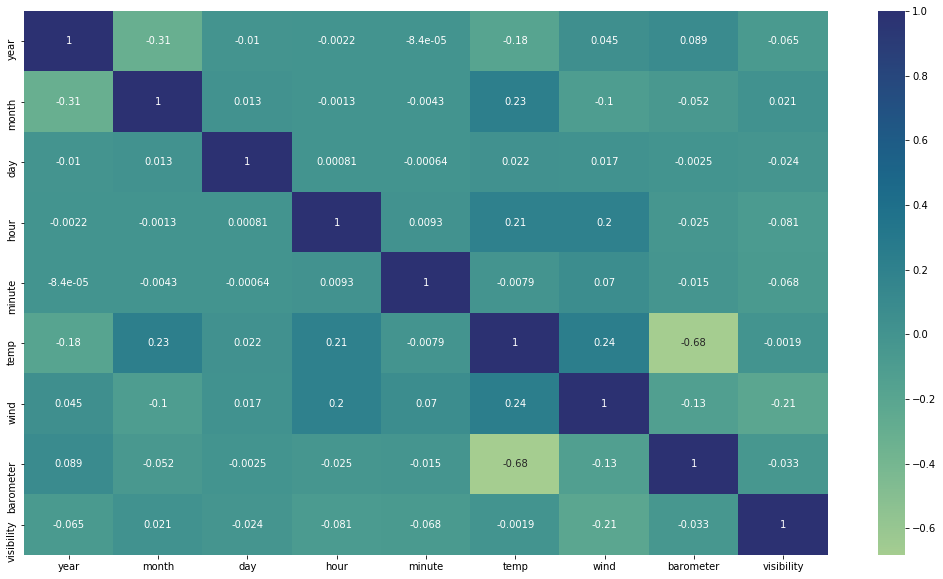

In [89]:
# Finding the relations between the variables
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap="crest",annot=True);

In [72]:
# The lines colors for our plot
line_colors = ['#8fd3f8', '#adc0db', '#6dc5f7', '#94add0', '#4cb8f5', '#7b9ac5',
              '#0d9cec', '#4b74ae', '#159c82', '#1abc9c', '#117d68', '#008c8e',
              '#00696b']

# Find the average wind power of every month for each city
data = df.groupby(['city','month'])['Power_Output_kW'].mean()
fig = px.line(data, 
              x = data.index.get_level_values('month'), 
              y = data.values,
              color=data.index.get_level_values('city'),
              color_discrete_sequence = line_colors,
              title="Monthly Average Wind Power Generated By Wind Turbines For Saudi Arabia Cities",
             labels=dict(x="Month", y="Average Wind Power (kW)", color="City Name:"))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show();

In [76]:
# The bars colors for our plot
bar_colors = ['#8fd3f8', '#adc0db', '#6dc5f7', '#94add0', '#4cb8f5', '#7b9ac5',
              '#0d9cec', '#4b74ae', '#159c82', '#1abc9c', '#117d68', '#008c8e',
              '#00696b']

# Find the total wind power of each city
data = df.groupby('city')['Power_Output_kW'].sum()
fig = px.bar(data,
             x = data.index, 
             y = data.values,
             color = data.index,
             color_discrete_sequence = bar_colors,
             title="The Total Wind Power Generated By Wind Turbines For Saudi Arabia Cities Over Time",
             labels=dict(x="City Name", y="Total Wind Power (kW)"))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_layout(showlegend=False)
fig.show()

Cities that generated the highest wind energy are: Baha, Jawf and Eastern Province , And cities that generated the lowest wind energy are: Madina, Assir and Riyadh.

In [73]:
# The lines colors for our plot
line_colors = ['#78ecd5', '#1abc9c', '#1ebbff','#007cb2', '#7b9ac5', '#2b4263']

# Find the average wind power of every month for each weather category
data = df.groupby(['weather_category','month'])['Power_Output_kW'].mean()
fig = px.line(data, 
              x = data.index.get_level_values('month'), 
              y = data.values,
              color=data.index.get_level_values('weather_category'),
              color_discrete_sequence=line_colors,
              title="Average Monthly Power Generated From Wind Turbines By Weather",
             labels=dict(x="Month", y="Average Wind Power (kW)", color="Weather:"))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show();

In [75]:
# The bars colors for our plot
bar_colors = ['#adc0db', '#6dc5f7', '#6287ba', '#0d9cec', '#36537c']

# Find the total wind power of each weather category
data = df.groupby('weather_category')['Power_Output_kW'].sum()
fig = px.bar(data,
             x = data.index, 
             y = data.values,
             color = data.index,
             color_discrete_sequence = bar_colors,
             title="The Total Wind Power Generated By Wind Turbines By Weather Over Time",
             labels=dict(x="Weather", y="Total Wind Power (kW)"))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_layout(showlegend=False)
fig.show()

We can see that the highest total wind power we received was from the clear weather category

In [71]:
# The lines colors for our plot
line_colors = ['#8fd3f8', '#adc0db', '#6dc5f7', '#94add0', '#4cb8f5', '#7b9ac5',
              '#0d9cec', '#4b74ae', '#159c82', '#1abc9c', '#117d68', '#008c8e',
              '#00696b']
# Find the average temperature of every month for each city 
data = df.groupby(['city','month'])['temp'].mean()

fig = px.line(data, 
              x = data.index.get_level_values('month'), 
              y = data.values,
              color=data.index.get_level_values('city'),
              color_discrete_sequence = line_colors,
              title="Monthly Average Temperatures For Saudi Arabia Cities",
             labels=dict(x="Month", y="Average Temperature (°C)", color="City Name:"))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show();

From May to September we can see that every city reaches their maximum temperature, And from December to February every city reaches their minimum temperature. 

In this project we will study the solar energy in Saudi Arabia, And we can generate solar energy from solar panels. 
The solar panels are highly affected by temperature, the ideal temperature for the solar panels is between 15 °C and 35 °C which solar cells will produce at maximum efficiency. So we can see from the plot there are some cities in this range like: Assir, Najran, Baha, Mecca,.. 

### Insight: Wind Speed through 24 Hours

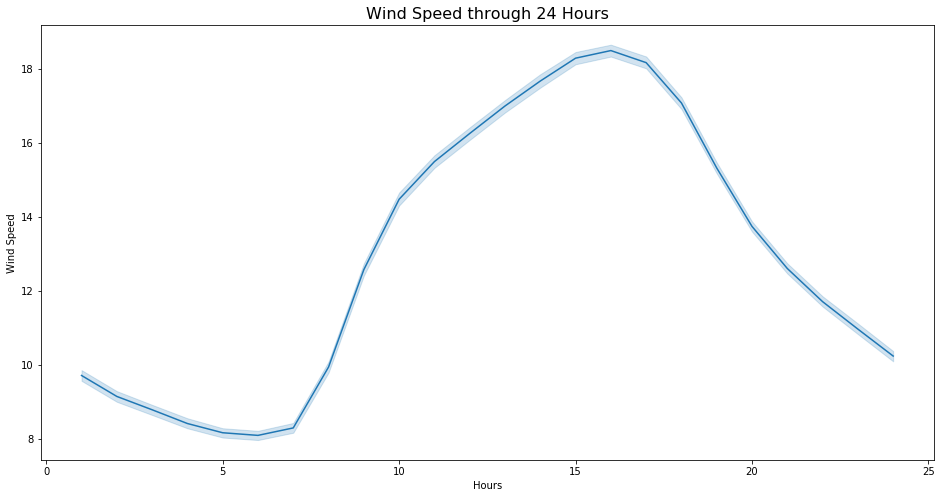

In [26]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = "hour", y="wind", data=df, palette='crest')
plt.xlabel("Hours") 
plt.ylabel("Wind Speed") 
plt.title("Wind Speed through 24 Hours",fontsize=16);
plt.show()

From the above diagram we can specify the hours where the wind speed is high, the wind speed plays an important factor in regards renewable energy. It is clear that from 10 to 20 will be the peak of wind speed, thus may give us a hint about the optimal time for wind turbines to be work.

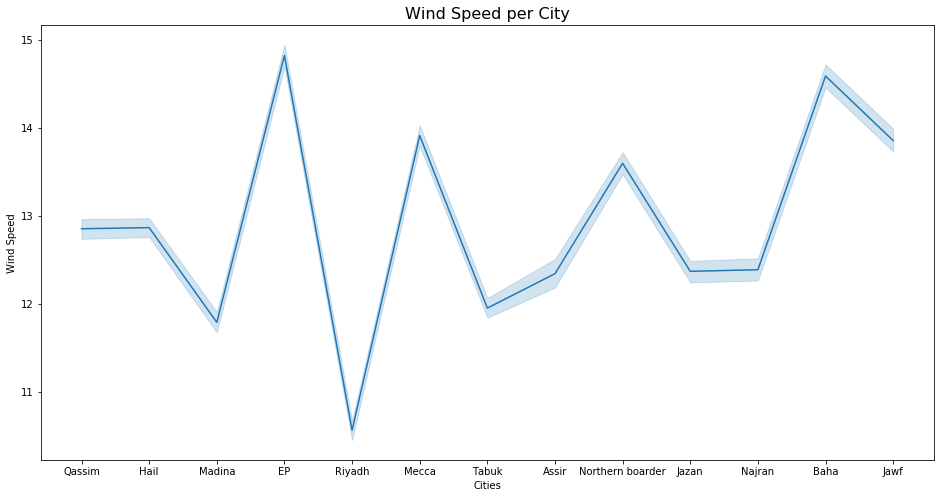

In [27]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = "city", y="wind", data=df, palette='crest')
plt.xlabel("Cities") 
plt.ylabel("Wind Speed") 
plt.title("Wind Speed per City",fontsize=16);
plt.show()

As we know the relationship between wind speed and the wind power is cubic relationship, thus if wind speed doubles, the power output will increase 8 times. Thus, choosing a good cities with high wind speed will give us cubic of the energy that aquired from another city that has less wind speed. Morover, if we combine the two diagrams (Wind Speeds through 24 Hours and Wind Speeds per City), we can specifiy optimal city for building wind turbines with optimal hours to run them, thus producing the renawable energy will be more efffective and save the cost.

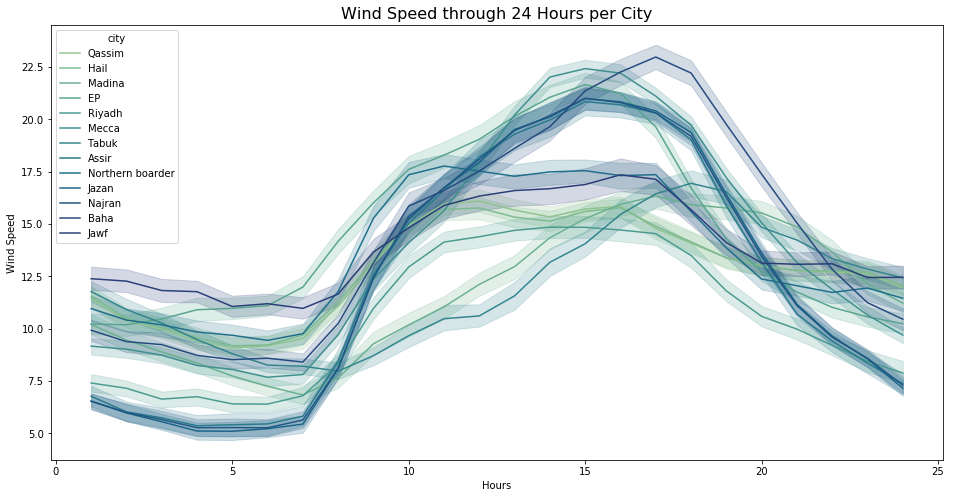

In [28]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = "hour", y="wind", hue="city", data=df, palette='crest')
plt.xlabel("Hours") 
plt.ylabel("Wind Speed") 
plt.title("Wind Speed through 24 Hours per City",fontsize=16);
plt.show()

### Insight: Temperature through 24 Hours

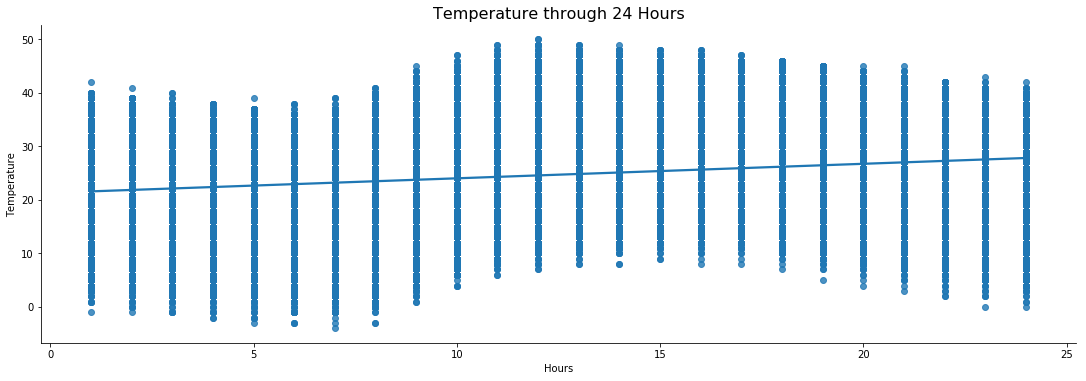

In [29]:
sns.lmplot(x="hour", y="temp", data=df, aspect=3)
plt.xlabel("Hours") 
plt.ylabel("Temperature") 
plt.title("Temperature through 24 Hours",fontsize=16);
plt.show()

Solar panels perform at peak efficiency between 15 and 35, however, the high degree can affect panels' efficiency. so, as we can see there are hours where temperature exceed 35, in theses case, we might need to search about a solution to decrease the temperature, for example: change the angle of panels. Also, choosing a city with an average temperature between 15 and 35 will give us peak efficiency.

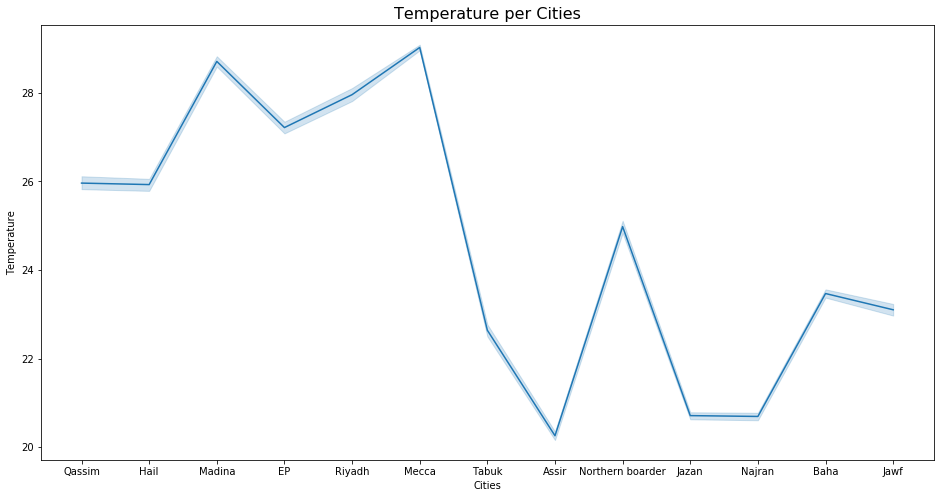

In [30]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = "city", y="temp", data=df, palette='crest')
plt.xlabel("Cities") 
plt.ylabel("Temperature") 
plt.title("Temperature per Cities",fontsize=16);
plt.show()

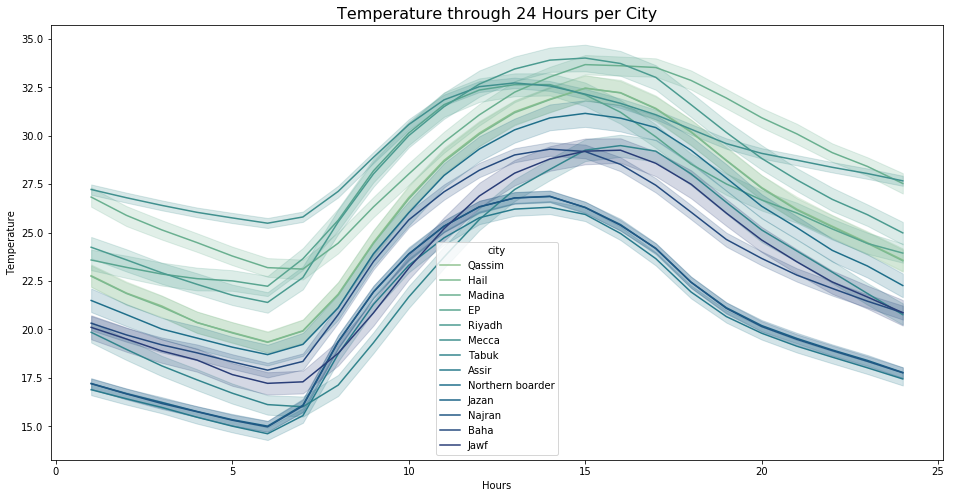

In [31]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = "hour", y="temp", hue="city", data=df, palette='crest')
plt.xlabel("Hours") 
plt.ylabel("Temperature") 
plt.title("Temperature through 24 Hours per City",fontsize=16);
plt.show()

### Insight: Humidity Percentage in Saudis Cities

In [32]:
df['humidity'] = df['humidity'].replace({'%':''}, regex = True)
df[["humidity"]] = df[["humidity"]].apply(pd.to_numeric)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

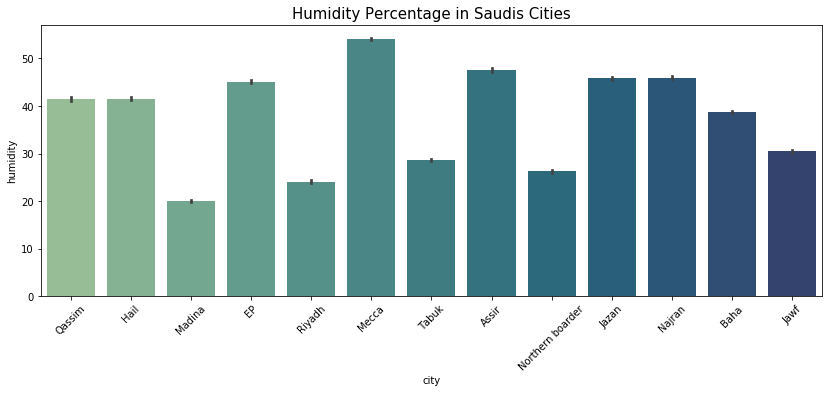

In [33]:
plt.figure(figsize = (14 , 5))
sns.barplot(x = 'city', 
            y = 'humidity', 
            data = df, 
            palette='crest')
plt.title("Humidity Percentage in Saudis Cities",fontsize=15)
plt.xticks(rotation = 45)
#plt.savefig('Insight_1.png')

### Insight: Temperature Degree in Saudis Cities

Text(0.5, 1.0, 'Temperature Degree in Saudis Cities')

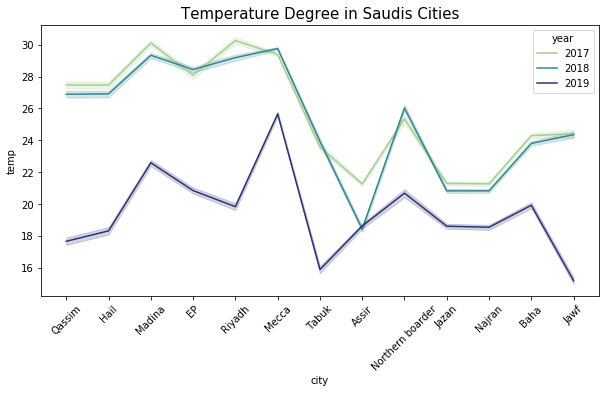

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.lineplot(x='city',
             y='temp',
             data=df,
             hue='year', 
             palette='crest')
plt.title("Temperature Degree in Saudis Cities",fontsize=15)
#sns.color_palette("light:#5A9", as_cmap=True)

#plt.savefig('Insight_2.png')

### Insight: Humidity Percentage in Each Year

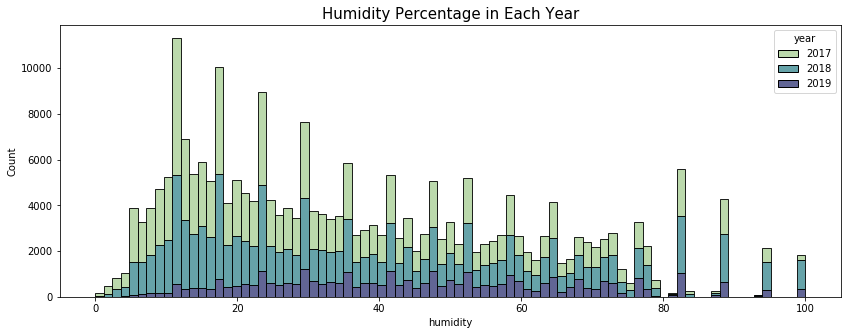

In [35]:
plt.figure(figsize = (14 , 5))
plt.title("Humidity Percentage in Each Year",fontsize=15)
sns.histplot(data= df, 
             x= 'humidity', 
             hue= 'year',
             multiple= 'stack', 
             palette='crest');
#sns.color_palette("light:#5A9", as_cmap=True)

#plt.savefig('Insight_3.png')

### Insight: Weather Type Counts in Each Year

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

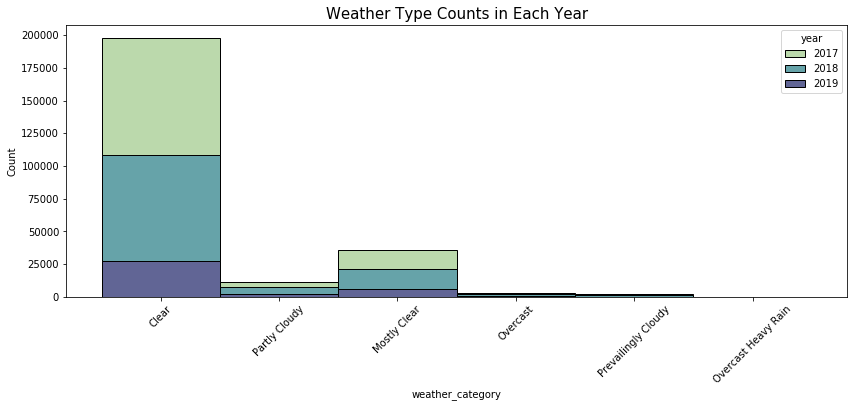

In [36]:
plt.figure(figsize = (14 , 5))
plt.title("Weather Type Counts in Each Year",fontsize=15)
sns.histplot(data= df, 
             x= 'weather_category', 
             hue= 'year', 
             multiple= 'stack', 
             palette='crest');
plt.xticks(rotation = 45)
#plt.savefig('Insight_4.png')